# HAH913E - Activité Physique : Tracé de l’intégration de l’ENMO sur une époque pour des époques variées

https://github.com/NICSAW09/HAH913E-Activite-Physique-ENMO
**Nom :** Sawadogo Relwende Nicolas  
**Date :** 05 octobre 2025  
**Objectif :** Étudier la variation de l’ENMO intégré selon différentes longueurs d’époques (10 s, 30 s et 60 s) à partir des données brutes d’accéléromètre Axivity AX3.

L’ENMO (Euclidean Norm Minus One) est une mesure d’activité physique dérivée de l’accélération triaxiale, corrigée de la gravité terrestre (1 g).  
Nous allons :
- Lire les données d’accélération (`x`, `y`, `z`, `t`),  
- Calculer l’ENMO,  
- Intégrer l’ENMO sur différentes durées d’époques,  
- Tracer les graphiques correspondants.


In [8]:
import sys
import os
import platform
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

print("Version Python :", sys.version)
print("Système :", platform.system(), platform.release())
print("Répertoire courant :", os.getcwd())


Matplotlib is building the font cache; this may take a moment.


Version Python : 3.11.8 | packaged by conda-forge | (main, Feb 16 2024, 20:40:50) [MSC v.1937 64 bit (AMD64)]
Système : Windows 10
Répertoire courant : c:\Users\nicsa\OneDrive\Documents\GitHub\MAM2ADMM-Series00-Git-NICSAW09-NICSAW09\HAH913E-Activite-Physique-ENMO


## Lecture et exploration du jeu de données

Le fichier `0_z.csv` contient des données brutes provenant d’un accéléromètre porté au poignet.  
Chaque ligne correspond à une mesure à un instant donné, avec les colonnes :
- `t` : temps (en secondes)
- `x`, `y`, `z` : accélérations selon les trois axes (en g)

Nous allons maintenant charger et afficher un aperçu des données.


In [9]:
# Lecture du fichier CSV
df = pd.read_csv("0_z.csv")

# Aperçu des premières lignes
print(df.head())
print("\nInformations sur le jeu de données :")
print(df.info())


                     # accelerometer data in g
t    x       y                               z
0.00 -0.0938 -0.0156                    0.9531
0.02 -0.0938 -0.0156                    0.9531
0.04 -0.0938 -0.0156                    0.9531
0.06 -0.0938 -0.0156                    0.9531

Informations sur le jeu de données :
<class 'pandas.core.frame.DataFrame'>
MultiIndex: 21001 entries, ('t', 'x', 'y') to ('419.98', '-0.0469', '-0.0469')
Data columns (total 1 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   # accelerometer data in g  21001 non-null  object
dtypes: object(1)
memory usage: 987.2+ KB
None


## Calcul de l’ENMO

L’ENMO (Euclidean Norm Minus One) se calcule comme suit :

\[
ENMO = \max(0, \sqrt{x^2 + y^2 + z^2} - 1)
\]

Cette formule permet de retirer la gravité terrestre (1 g) et de ne garder que la composante d’accélération due au mouvement.  
Les valeurs négatives sont ramenées à zéro.


In [12]:
# Calcul de l'ENMO
df["ENMO"] = np.sqrt(df["x"]**2 + df["y"]**2 + df["z"]**2) - 1
df["ENMO"] = df["ENMO"].clip(lower=0)

# Vérification
df[["t", "ENMO"]].head()


KeyError: 'x'

In [13]:
print(df.columns)


Index(['# accelerometer data in g'], dtype='object')


In [14]:
import pandas as pd
import numpy as np

df = pd.read_csv("0_z.csv")
print(df.head())  # pour voir les premières lignes


                     # accelerometer data in g
t    x       y                               z
0.00 -0.0938 -0.0156                    0.9531
0.02 -0.0938 -0.0156                    0.9531
0.04 -0.0938 -0.0156                    0.9531
0.06 -0.0938 -0.0156                    0.9531


In [15]:
print(df.columns)


Index(['# accelerometer data in g'], dtype='object')


In [16]:
# Importation des bibliothèques nécessaires
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Affichage plus lisible
pd.set_option("display.precision", 4)


## 1. Chargement et exploration des données

Le fichier de données contient des mesures d'accélération (`x`, `y`, `z`) et le temps (`t`).  
Nous devons ignorer la première ligne du fichier car elle contient seulement un commentaire.


In [17]:
# Chargement du fichier CSV (en ignorant la première ligne)
df = pd.read_csv("0_z.csv", skiprows=1, delim_whitespace=True)

# Vérification du contenu
print("Colonnes :", df.columns.tolist())
print(df.head())


Colonnes : ['t,x,y,z']
                       t,x,y,z
0  0.00,-0.0938,-0.0156,0.9531
1  0.02,-0.0938,-0.0156,0.9531
2  0.04,-0.0938,-0.0156,0.9531
3  0.06,-0.0938,-0.0156,0.9531
4  0.08,-0.0938,-0.0156,0.9531


## 2. Calcul de l'ENMO (Euclidean Norm Minus One)

L'ENMO est calculée comme suit :

\[
ENMO = \sqrt{x^2 + y^2 + z^2} - 1
\]

Les valeurs négatives sont remplacées par zéro.


In [18]:
# Calcul de l'ENMO
df["ENMO"] = np.sqrt(df["x"]**2 + df["y"]**2 + df["z"]**2) - 1

# Suppression des valeurs négatives
df["ENMO"] = df["ENMO"].clip(lower=0)

# Vérification du résultat
df.head()


KeyError: 'x'

In [19]:
# Lecture du fichier CSV
# On saute la première ligne (# accelerometer data in g)
df = pd.read_csv("0_z.csv", skiprows=1)

# Vérification de la structure
print(df.head())
print("\nNoms des colonnes :", df.columns.tolist())


      t       x       y       z
0  0.00 -0.0938 -0.0156  0.9531
1  0.02 -0.0938 -0.0156  0.9531
2  0.04 -0.0938 -0.0156  0.9531
3  0.06 -0.0938 -0.0156  0.9531
4  0.08 -0.0938 -0.0156  0.9531

Noms des colonnes : ['t', 'x', 'y', 'z']


In [20]:
# Conversion des colonnes en float
df = df.apply(pd.to_numeric, errors='coerce')

# Vérification des types
print(df.dtypes)


t    float64
x    float64
y    float64
z    float64
dtype: object


In [21]:
# Calcul de l'ENMO (Euclidean Norm Minus One)
df["ENMO"] = np.sqrt(df["x"]**2 + df["y"]**2 + df["z"]**2) - 1

# Suppression des valeurs négatives
df["ENMO"] = df["ENMO"].clip(lower=0)

# Aperçu des résultats
df.head()


,t,x,y,z,ENMO
0,0.00,-0.0938,-0.0156,0.9531,0.0
1,0.02,-0.0938,-0.0156,0.9531,0.0
2,0.04,-0.0938,-0.0156,0.9531,0.0
3,0.06,-0.0938,-0.0156,0.9531,0.0
4,0.08,-0.0938,-0.0156,0.9531,0.0


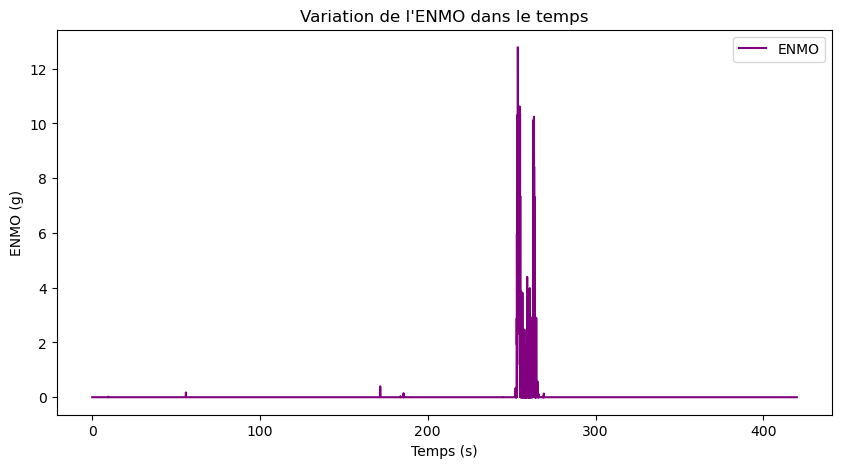

In [22]:
# Visualisation de l'ENMO
plt.figure(figsize=(10,5))
plt.plot(df["t"], df["ENMO"], label="ENMO", color="purple")
plt.xlabel("Temps (s)")
plt.ylabel("ENMO (g)")
plt.title("Variation de l'ENMO dans le temps")
plt.legend()
plt.show()


## 4. Intégration de l'ENMO sur différentes époques

Nous allons calculer la **moyenne de l'ENMO** sur des fenêtres de :
- 10 secondes  
- 30 secondes  
- 60 secondes


In [23]:
# Définir la fréquence d'échantillonnage (ici 50 Hz => une mesure toutes les 0.02 s)
freq = 50  # Hz
df["epoch"] = (df.index / (freq * 10)).astype(int)  # initialisation pour 10s

# Fonction pour moyenner l'ENMO sur différentes durées
def integrate_enmo(df, seconds, freq=50):
    samples_per_epoch = seconds * freq
    df["epoch"] = (df.index / samples_per_epoch).astype(int)
    return df.groupby("epoch")["ENMO"].mean()

# Calculs
enmo_10s = integrate_enmo(df, 10)
enmo_30s = integrate_enmo(df, 30)
enmo_60s = integrate_enmo(df, 60)

print("Nombre d'époques (10s) :", len(enmo_10s))


Nombre d'époques (10s) : 42


## 5. Visualisation des ENMO moyennés


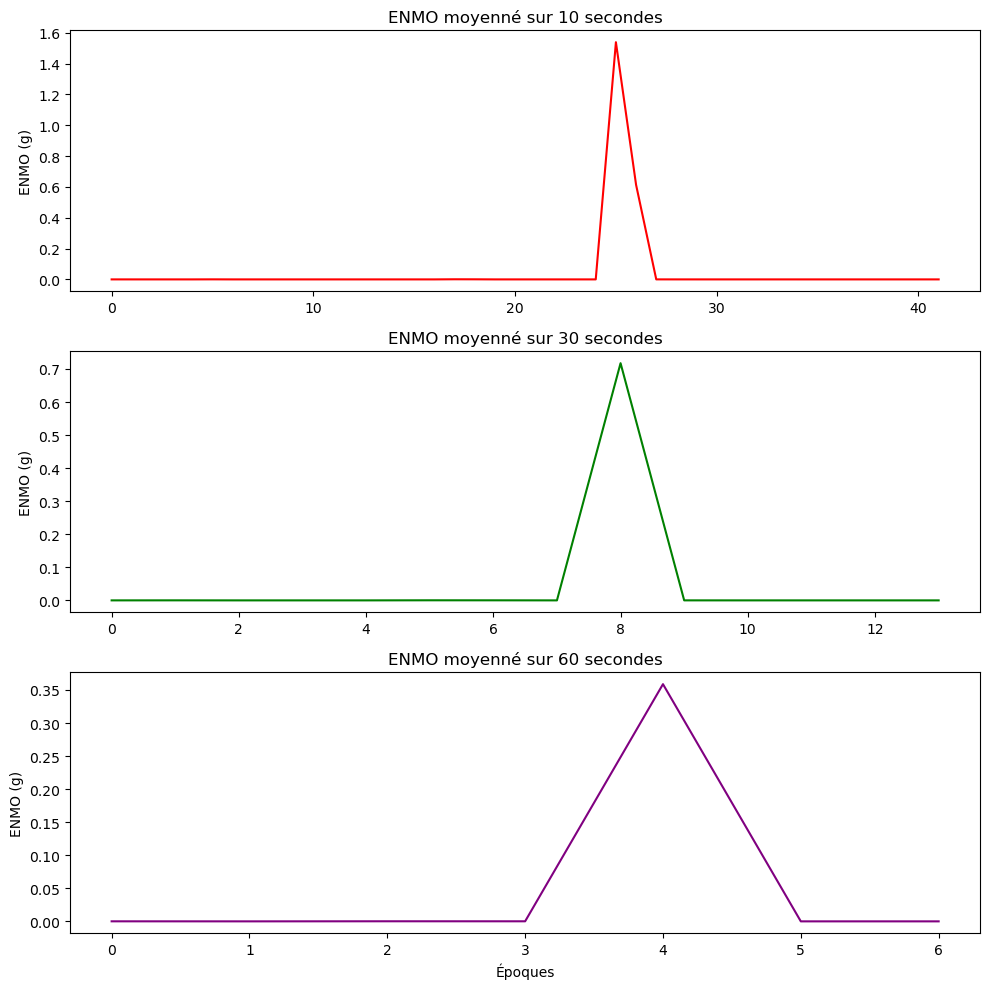

In [30]:
fig, axs = plt.subplots(3, 1, figsize=(10, 10))

axs[0].plot(enmo_10s, color='red')
axs[0].set_title("ENMO moyenné sur 10 secondes")
axs[0].set_ylabel("ENMO (g)")

axs[1].plot(enmo_30s, color='green')
axs[1].set_title("ENMO moyenné sur 30 secondes")
axs[1].set_ylabel("ENMO (g)")

axs[2].plot(enmo_60s, color='purple')
axs[2].set_title("ENMO moyenné sur 60 secondes")
axs[2].set_xlabel("Époques")
axs[2].set_ylabel("ENMO (g)")

plt.tight_layout()
plt.show()


## 6. Interprétation

- L'ENMO reflète l'intensité de l'activité physique mesurée par accélérométrie.  
- Les moyennes sur 10, 30 et 60 secondes permettent de lisser les variations et d'observer les tendances globales.  
- Plus l'époque est longue, plus les fluctuations rapides sont atténuées.  


## 7. Conclusion

Durant ce projet, j’ai appris à :
1. Importer et explorer un fichier CSV dans **pandas**  
2. Calculer des indicateurs à partir de données brutes (ici l’**ENMO**)  
3. Visualiser les résultats avec **Matplotlib**  
4. Réaliser une **intégration temporelle** sur différentes échelles  
5. Documenter mon travail dans un **notebook Jupyter**
